Trying out SMOTE , Undersampling for imbalanced APS Failure classification.  

Data source : https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [3]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.feature_selection import RFE

In [4]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve , precision_recall_curve, f1_score, average_precision_score
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV, KFold


In [5]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

In [20]:
## Read in the train data sets 
train_data_1 = pd.read_csv("train_data_1.csv")


In [21]:
## Read in the test data sets 
test_data_1 = pd.read_csv("test_data_1.csv")


In [8]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   60000 non-null  object 
 1   ag_003  60000 non-null  float64
 2   ag_004  60000 non-null  float64
 3   ag_005  60000 non-null  float64
 4   ag_006  60000 non-null  float64
 5   ag_007  60000 non-null  float64
 6   ah_000  60000 non-null  float64
 7   al_000  60000 non-null  float64
 8   ap_000  60000 non-null  float64
 9   ay_001  60000 non-null  float64
 10  ay_005  60000 non-null  float64
 11  ay_006  60000 non-null  float64
 12  ay_007  60000 non-null  float64
 13  ay_008  60000 non-null  float64
 14  az_003  60000 non-null  float64
 15  az_004  60000 non-null  float64
 16  az_005  60000 non-null  float64
 17  az_006  60000 non-null  float64
 18  ba_000  60000 non-null  float64
 19  ba_006  60000 non-null  float64
 20  ba_007  60000 non-null  float64
 21  cj_000  60000 non-null  float64
 22

In [9]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22

In [22]:
cols = train_data_1.columns.tolist()
cont_features = cols[1:]

In [10]:
def perform_classification(model , X_train,X_test,y_train,y_test, classifier):
    
    model = model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix with the predicted class  :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    if classifier == 'dt':
            print("\n Max depth:{} ".format(model.tree_.max_depth))
        
    
    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.scatter(fpr[ix1], tpr[ix1], marker='o', color='black', label='Best')
    plt.show()
    
    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    ####
    # convert to f score
    #fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest recall 
    #ix = np.argmax(recall)
    #best_threshold = pr_thresholds[ix]
    #print('Best Threshold for PR curve =%f, Recall=%.3f' % (pr_thresholds[ix], recall[ix]))
    ####
    
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    def cal_opt_class(val, threshold):
        return (val >= threshold).astype('int')
    
    #opt_class = pd.Series(preds).apply(lambda x: cal_opt_class(x,best_threshold))
    
    #print("Confusion matrix with opt threshold:\n{}".format(confusion_matrix(y_test,opt_class)))
    
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # define thresholds
    #thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    #scores = [f1_score(y_test, to_labels(preds, t)) for t in thresholds]
    # get best threshold
    #ix = np.argmax(scores)
    #print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    #p_class = to_labels(preds , thresholds[ix])
    #print("Confusion matrix with opt threshold search :\n{}".format(confusion_matrix(y_test,p_class)))
    
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : y_test , "pred_class" : test_pred})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]
    
    total_cost = fp*10 + fn*500
    
    print("Total_cost of mis- classification : {}".format(total_cost))
    
    ## Plot Variable importance for decision tree , random forest
    if (classifier == 'dt') | (classifier == 'rf') | (classifier == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,5))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)


In [11]:
train_data_1['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [23]:
def make_numeric(val):
    if val == 'neg':
        return 0
    else:
        return 1
train_data_1['label'] = train_data_1['class'].apply(lambda x: make_numeric(x))

In [24]:
train_data_1['label'].value_counts()

0    59000
1     1000
Name: label, dtype: int64

In [25]:
test_data_1['label'] = test_data_1['class'].apply(lambda x: make_numeric(x))

In [26]:
test_data_1['label'].value_counts()

0    15625
1      375
Name: label, dtype: int64

In [33]:
def feature_selection(model, data , cont_features):
    """
    for the given model , data and features, select the best features with RFE.
    """
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[cont_features] = scaler.fit_transform(data1[cont_features])
    ##
    predictors = data1[cont_features]
    ##
    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_validate : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_validate : {}".format(y_validate.shape))
    ##
    print("\n Perform SMOTE for balancing train data.")
    oversample = SMOTE(sampling_strategy = 0.5, random_state = 12)
    print(y_train.value_counts())
    X_os,y_os = oversample.fit_resample(X_train,y_train)
    print(y_os.value_counts())
    ##
    
    rfe = RFE(model, n_features_to_select = 10)
    fit = rfe.fit(X_os, y_os)
    # report selected features
    names = X_train.columns
    print('Selected Features:\n')
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ##
    # plot feature rank

    ticks = [i for i in range(len(names))]
    selected_ranking = []
    selected_ticks = []
    ranking = list(fit.ranking_)
    for i in range(len(names)):
        if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
            selected_ranking.append(ranking[i])
            selected_ticks.append(list(names)[i])
        
    plt.figure(figsize = (15,5))
    plt.bar(selected_ticks, selected_ranking)
    plt.xticks(selected_ticks, rotation = 90)
    plt.ylabel("Rankings")
    plt.title("First 3 ranks")
    plt.show()
    
    return

In [99]:
def parameter_tuning(model, param_grid, data , n_features):
    
    ## make the pipeline for SMOTE and then classification.
    imb_pipe = make_pipeline(SMOTE(random_state = 12) , model)
    
    ## create the param grid for the classifier
    new_params = {"logisticregression__"+ key : param_grid[key] for key in param_grid}
    
    p_grid = dict(logisticregression__class_weight = param_grid)
    #param_grid = dict(reduce_dim__n_components=[2, 5, 10],clf__C=[0.1, 10, 100])
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_test : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_test : {}".format(y_validate.shape))

    cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 12)
    
    grid_search = GridSearchCV(imb_pipe,new_params, cv=cv, scoring = 'recall')
    grid_search.fit(X_train, y_train)
    #
    print(grid_search.best_params_)
    #
    model_best = grid_search.best_estimator_
    model_predictions = model_best.predict(X_validate)
    #
    print("Test set score using predicted labels: {:.2f}".format(np.mean(model_predictions == y_validate)))

    print("Calculated Test set score: {:.2f}".format(model_best.score(X_validate,y_validate)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_validate,model_predictions)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_validate,model_predictions)))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model_best.predict_proba(X_validate)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_validate, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    ##Calculate AUC and plot precision recall curve.
    precision, recall, thresholds = precision_recall_curve(y_validate, preds)
    pr_auc = auc(recall, precision)
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    return
    

In [100]:
def cross_validation(model, data , n_features , sampling_strategy):
    """
    Input variables : model for classification , features , sampling strategy for SMOTE 
    """
    
    ##create a pipeline for performing SMOTE and then classification.
    imb_pipe = make_pipeline(SMOTE(sampling_strategy = sampling_strategy, random_state = 12) , model)
    ## 5 fold stratified split 
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 33)
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    scores = cross_val_score(imb_pipe , predictors , data1['label'], cv = cv,scoring = 'recall' )
    print(scores)
    print("\n Avg AUC score for PR curve:{}".format(scores.mean()))

    ## predict class
    pred_class = cross_val_predict(imb_pipe, predictors , data1['label'], cv = cv )

    ##predict probability values
    predicted = cross_val_predict(model, predictors, data1['label'], cv = cv, method = 'predict_proba' )
    print("Confusion matrix :\n{}".format(confusion_matrix(data1['label'],pred_class)))

    ##calculate roc auc
    fpr, tpr, thresholds = roc_curve(data1['label'], predicted[:,1])
    roc_auc = auc(fpr, tpr)
    ##

    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(data1['label'], predicted[:,1])
    pr_auc = auc(recall, precision)
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : data1['label'] , "pred_class" : pred_class})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]    
    total_cost = fp*10 + fn*500    
    print("Total_cost of mis- classification : {}".format(total_cost))

    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

    return


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
1    47200
0    47200
Name: label, dtype: int64
Selected Features:

ag_003
ag_005
ag_006
ag_007
ay_006
ay_007
ck_000
cn_002
cn_006
ee_005


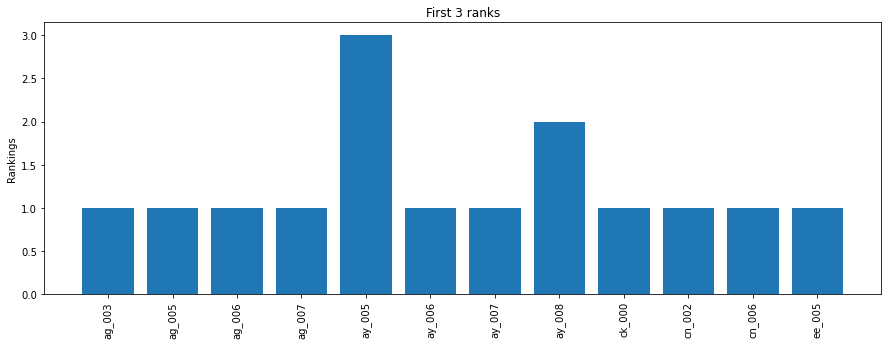

In [29]:
model = LogisticRegression(solver='liblinear')
feature_selection(model , train_data_1 , cont_features)


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
0    47200
1    23600
Name: label, dtype: int64
Selected Features:

ag_003
ag_005
ag_006
ag_007
ay_006
ay_007
ck_000
cn_002
cn_006
ee_005


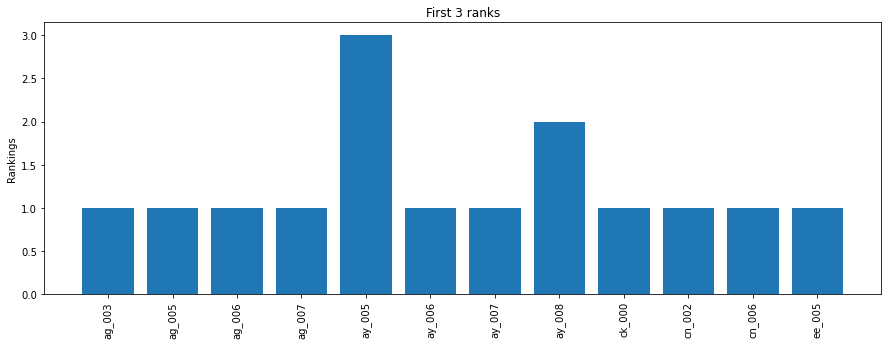

In [35]:
## with sampling strategy = 0.5
model = LogisticRegression(solver='liblinear')
feature_selection(model , train_data_1 , cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
1    47200
0    47200
Name: label, dtype: int64

 Train Score : 0.9434957627118644
Train Accuracy using predicted labels :0.9434957627118644
Test set score using predicted labels: 0.96
Calculated Test set score: 0.96
Accuracy score :0.961
Confusion matrix with the predicted class  :
[[11359   441]
 [   23   177]]


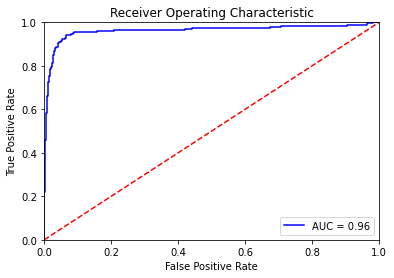

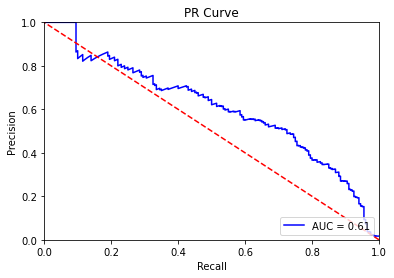

Total_cost of mis- classification : 15910


In [30]:
## with sampling strategy = 1 
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##
print("\n Perform SMOTE for balancing train data.")
oversample = SMOTE( random_state = 12)
print(y_train.value_counts())
X_os,y_os = oversample.fit_resample(X_train,y_train)
print(y_os.value_counts())
    ##

lg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_os, X_validate, y_os, y_validate , 'lg')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
0    47200
1    23600
Name: label, dtype: int64

 Train Score : 0.9515536723163842
Train Accuracy using predicted labels :0.9515536723163842
Test set score using predicted labels: 0.96
Calculated Test set score: 0.96
Accuracy score :0.961
Confusion matrix with the predicted class  :
[[11358   442]
 [   22   178]]


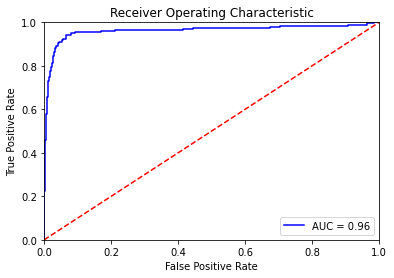

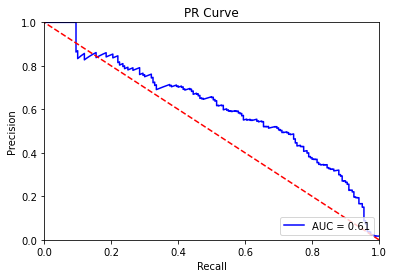

Total_cost of mis- classification : 15420


In [36]:
## with sampling strathey = 0.5 
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##
print("\n Perform SMOTE for balancing train data.")
oversample = SMOTE( sampling_strategy = 0.5, random_state = 12)
print(y_train.value_counts())
X_os,y_os = oversample.fit_resample(X_train,y_train)
print(y_os.value_counts())
##

lg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_os, X_validate, y_os, y_validate , 'lg')

Its seen that with sampling stratgy of 0.5 , same results as that of sampling strategy of 1 is achieved. Hence we can continue the analysis with sampling strategy of 0.5 .  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'logisticregression__class_weight': {0: 0.005, 1: 0.995}}
Test set score using predicted labels: 0.02
Calculated Test set score: 0.02
Accuracy score :0.017
Confusion matrix :
[[    8 11792]
 [    0   200]]


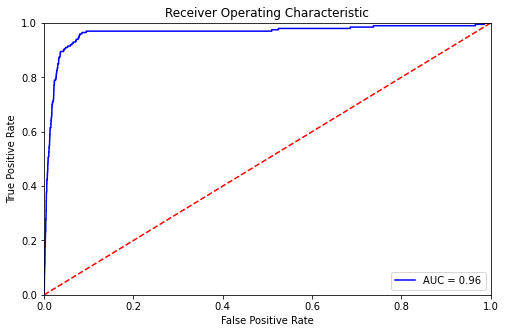

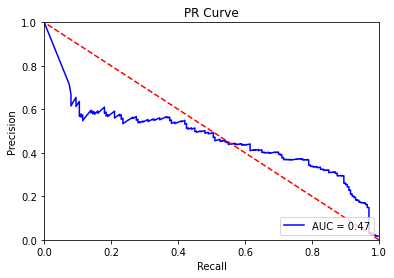

In [94]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']
lg = LogisticRegression(random_state = 111, solver = 'liblinear')
param_grid = {
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}],
            }
parameter_tuning(model =lg, param_grid = param_grid, data = train_data_1 , n_features = n_features)

With the selected weights :


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
0    47200
1    23600
Name: label, dtype: int64

 Train Score : 0.3340819209039548
Train Accuracy using predicted labels :0.3340819209039548
Test set score using predicted labels: 0.02
Calculated Test set score: 0.02
Accuracy score :0.018
Confusion matrix with the predicted class  :
[[   15 11785]
 [    0   200]]


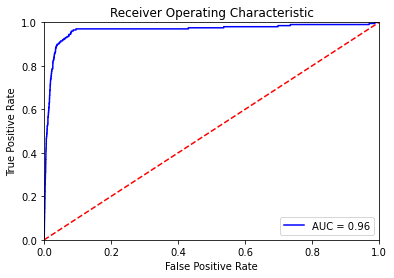

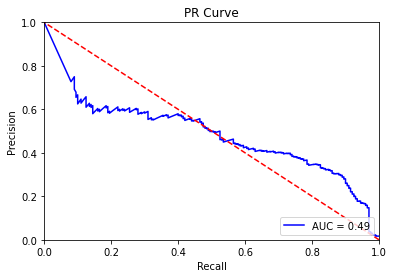

Total_cost of mis- classification : 117850


In [90]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##
##
print("\n Perform SMOTE for balancing train data.")
oversample = SMOTE( sampling_strategy = 0.5, random_state = 12)
print(y_train.value_counts())
X_os,y_os = oversample.fit_resample(X_train,y_train)
print(y_os.value_counts())
##


lg = LogisticRegression(class_weight = {0:0.005 , 1:0.995}, solver = 'liblinear')
perform_classification(lg , X_os, X_validate, y_os, y_validate , 'lg')

Cross Validation:

With 'balanced' weights and sampling strategy = 0.5

[0.915 0.92  0.9   0.885 0.905]

 Avg AUC score for PR curve:0.905
Confusion matrix :
[[57118  1882]
 [   95   905]]
Total_cost of mis- classification : 66320


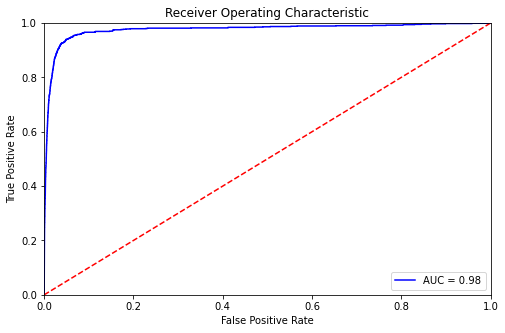

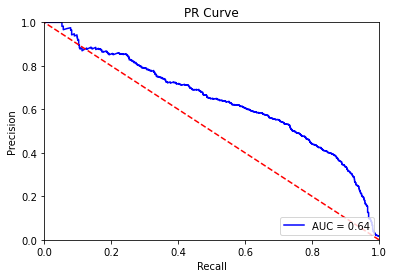

In [101]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']
lg = LogisticRegression(class_weight = "balanced", random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features , sampling_strategy = 0.5)

With the selected class weights and sampling strategy of 0.5

[1.    1.    1.    1.    0.995]

 Avg AUC score for PR curve:0.999
Confusion matrix :
[[   35 58965]
 [    1   999]]
Total_cost of mis- classification : 590150


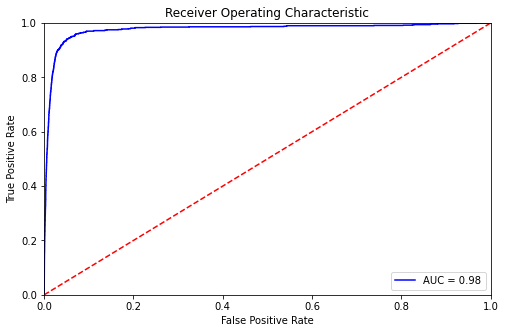

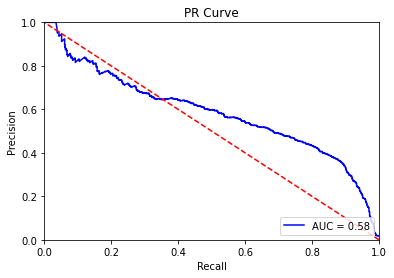

In [102]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']
lg = LogisticRegression(class_weight = {0:0.005 ,1:0.995} , random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features, sampling_strategy = 0.5 )

"balanced" weights and sampling strategy of 0.8

[0.915 0.92  0.9   0.885 0.905]

 Avg AUC score for PR curve:0.905
Confusion matrix :
[[57115  1885]
 [   95   905]]
Total_cost of mis- classification : 66350


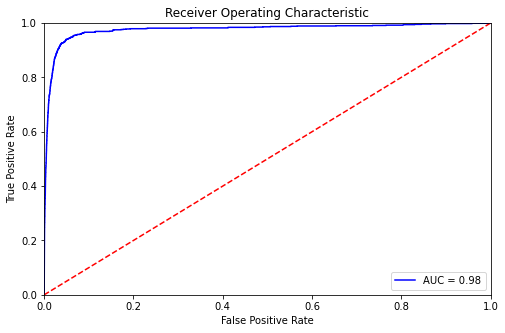

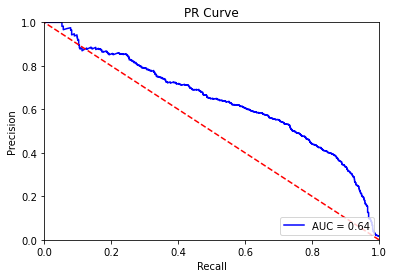

In [103]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']
lg = LogisticRegression(class_weight = "balanced", random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features , sampling_strategy = 0.8)

Check performance on test data :


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
0    47200
1    23600
Name: label, dtype: int64

 Train Score : 0.9515254237288135
Train Accuracy using predicted labels :0.9515254237288135
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.973
Confusion matrix with the predicted class  :
[[15242   383]
 [   50   325]]


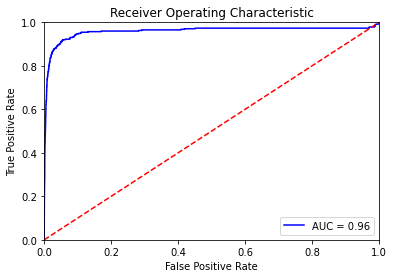

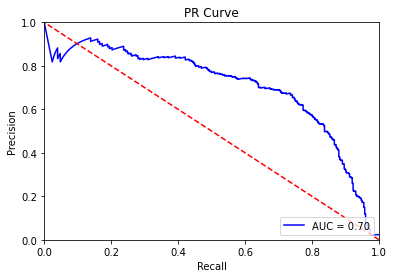

Total_cost of mis- classification : 28830


In [42]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##
print("\n Perform SMOTE for balancing train data.")
oversample = SMOTE( sampling_strategy = 0.5, random_state = 12)
print(y_train.value_counts())
X_os,y_os = oversample.fit_resample(X_train,y_train)
print(y_os.value_counts())
##

lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
perform_classification(lg , X_os, X_test, y_os, y_test , 'lg')


Test the model with specified weights on test data:


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Perform SMOTE for balancing train data.
0    47200
1      800
Name: label, dtype: int64
0    47200
1    23600
Name: label, dtype: int64

 Train Score : 0.3340819209039548
Train Accuracy using predicted labels :0.3340819209039548
Test set score using predicted labels: 0.03
Calculated Test set score: 0.03
Accuracy score :0.026
Confusion matrix with the predicted class  :
[[   40 15585]
 [    0   375]]


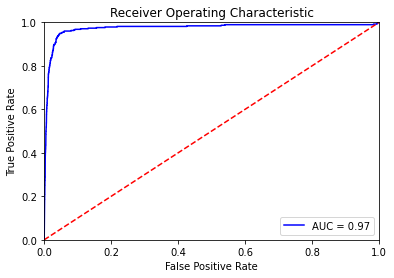

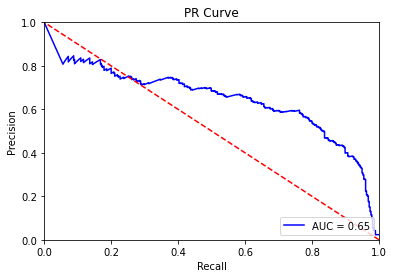

Total_cost of mis- classification : 155850


In [93]:
n_features = ['ag_003','ag_005','ag_006','ag_007','ay_005','ay_006','ay_007','ay_008','ck_000','cn_002','cn_006','ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##
print("\n Perform SMOTE for balancing train data.")
oversample = SMOTE( sampling_strategy = 0.5, random_state = 12)
print(y_train.value_counts())
X_os,y_os = oversample.fit_resample(X_train,y_train)
print(y_os.value_counts())
##

lg = LogisticRegression(class_weight = {0:0.005,1:0.995}, random_state = 12 , solver = 'liblinear')
perform_classification(lg , X_os, X_test, y_os, y_test , 'lg')


Logistic Regression model with  SMOTE (sampling stratgey = 0.5) performs lower than non SMOTE. The cost is increased by 40% and the TP are reduced by 16. 